In [1]:
import os
import sys
import cv2
import glob
import joblib
from pathlib import Path
import numpy as np
from time import time
from queue import Queue
from collections import namedtuple

sys.path.append('/home/huy/capstone/godofeye/lib')
sys.path.append('/home/huy/capstone/godofeye/lib/yoloface')

from blueeyes.face_recognition import FaceDetector, FaceRecognition, FeatureExtractor, ModelTraining
from blueeyes.utils import Camera

Set config.gpu_options.allow_growth to True


### Face Crop from Images (Optional)

In [2]:
from pathlib import Path

IMAGES_DIR = '/home/huy/data/face_recog/train_test_raw/'
OUTPUT_DIR = '/home/huy/data/face_recog/train_test'

detector = FaceDetector('mtcnn', min_face_size=50)

count = 0

for img_path in glob.glob(IMAGES_DIR + '/**/*.jpg', recursive=True):
    path = Path(img_path)
    id = path.parent.name
    im = cv2.imread(str(path), 1)
    boxes = detector.detect(im)
    for left,top,right,bottom in boxes:
        crop = im[top:bottom,left:right,:]
        output_dir = OUTPUT_DIR + f'/{id}'
        output_path = output_dir + f'/{count}.jpg'
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        cv2.imwrite(output_path, crop)
        print('Write to ', output_path)
        count += 1

Using TensorFlow backend.


### Create Train Test Set

In [ ]:
from pathlib import Path

train_set_dict = {}
test_set_dict = {}

TRAINSET_LOCATION = '/home/huy/Downloads/CBGVDataset_v3.2/Aug3/*/WM/*.jpg'
TESTSET_LOCATION = '/home/huy/smartbuilding/face_recog_models/dataset/CBGVDataset_v2/*/WM/test/*.jpg'

for path in glob.glob(TRAINSET_LOCATION):
    path = Path(path)
    id = path.parent.parent.parent.name
    if id not in train_set_dict.keys():
        train_set_dict[id] = []
    train_set_dict[id].append(str(path)) 
for path in glob.glob(TESTSET_LOCATION):
    path = Path(path)
    id = path.parent.parent.parent.name
    if id not in test_set_dict.keys():
        test_set_dict[id] = []
    test_set_dict[id].append(str(path))

# for entry in os.scandir('/home/huy/face_recog/dataset/Data v4.1/train_set_mix'):
#     id = entry.name
#     train_paths = []
#     test_paths = []
#     all_paths = glob.glob(os.path.join(entry.path, '*'))
#     np.random.shuffle(all_paths)
#     for path in all_paths[2:len(all_paths)]:
#         train_paths.append(os.path.abspath(path))
#     for path in all_paths[0:2]:
#         test_paths.append(os.path.abspath(path))
# #     for path in all_paths:
# #         train_paths.append(os.path.abspath(path))
#     train_set_dict[id] = train_paths
#     test_set_dict[id] = test_paths

In [2]:
# auto split train test
from pathlib import Path

RATIO = 1.0

all_set_dict = {}
train_set_dict = {}
test_set_dict = {}

TRAINSET_LOCATION = '/home/huy/Downloads/Aug5(train+WM)/Aug5/*/train/*.jpg'

for path in glob.glob(TRAINSET_LOCATION, recursive=True):
    path = Path(path)
    id = path.parent.parent.name
    if id not in all_set_dict.keys():
        all_set_dict[id] = []
    all_set_dict[id].append(str(path)) 

for label, paths in all_set_dict.items():
    n = int(len(paths)*RATIO)
    train_set_dict[label] = paths[0:n]
    test_set_dict[label] = paths[n:]

In [4]:
train_set_dict.keys()

dict_keys(['11102', '10222', '11109', '11100', '11468', '11248', '10354', '11074', '1641764600', '10542', '10225', '10635', '11410', '10766', '11321', '10887', '11281', '10888', '10473', '10600', '11409', '10576', '11272', '10872', '9944005072', '11280', '10349', '11458', '11214', '10402', '10272', '10125', '10276', '11499', '11500', '11160', '11243', '10398', '11185', '11201', '10307', '11226', '10861', '11317', '11193', '10533', '10437', '10329', '10358', '10087', '11118', '11249', '10250', '11072', '10283', '11088', '11318', '193019', '11273', '10423', '11251', '11070', '10359', '11216', '11184', '1149822', '9563444161', '11267', '10234', '11456', '11489', '10171', '10824', '10220', '11245', '10966', '11455', '10609', '10229', '8493773300'])

### Create train and test data

In [27]:
feature_extractor = FeatureExtractor('dlib')
model_trainer = ModelTraining(feature_extractor=feature_extractor)

In [ ]:
model_trainer.create_train_set(train_set_dict, output_model_location='/home/huy/face_recog/encoded_data/aug5_train', process=4)

In [ ]:
model_trainer.create_train_set(test_set_dict, output_model_location='/home/huy/face_recog/encoded_data/test')

In [28]:
# LOCATION = '/home/huy/Downloads/Aug5(train+WM)/Aug5/*/WM/*.jpg'
LOCATION = '/home/huy/Downloads/CBGVDataset_v3.3(train+test)/*/WM/*.jpg'
data_dict = {}
for path in glob.glob(LOCATION):
    path = Path(path)
    id = path.parent.parent.name
    if id not in data_dict.keys():
        data_dict[id] = []
    data_dict[id].append(str(path))

In [29]:
data_dict.keys()

dict_keys(['11102', '10222', '11109', '11100', '11468', '11248', '10354', '11074', '1641764600', '10542', '10225', '10635', '11410', '10766', '11321', '10887', '11281', '10888', '10473', '10600', '11409', '10576', '11272', '10872', '9944005072', '11280', '10349', '11458', '11214', '10402', '10272', '10125', '10276', '11499', '11500', '11160', '11243', '10398', '11185', '11201', '10307', '11226', '10861', '11317', '11193', '10533', '10437', '10329', '10358', '10087', '11118', '11249', '10250', '11072', '10283', '11088', '11318', '193019', '11273', '10423', '11251', '11070', '10359', '11216', '11184', '1149822', '9563444161', '11267', '10234', '11456', '11489', '10171', '10824', '10220', '11245', '10966', '11455', '10609', '10229', '8493773300'])

In [ ]:
model_trainer.create_train_set(data_dict, output_model_location='/home/huy/face_recog/encoded_data/aug5_test_wm', process=6)

### Train model

In [3]:
data = joblib.load('/home/huy/face_recog/encoded_data/aug5_train/features.joblib')
features, labels = list(zip(*data))

In [10]:
len(features)

56000

In [6]:
model_trainer.train_knn(features, labels, K=300, weights='uniform', output_model_location='/home/huy/face_recog/models/knn')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=300, p=2,
                     weights='uniform')


In [7]:
model = model_trainer.train_simple_model(features, labels, output_model_location='/home/huy/face_recog/models/simple_distance')

In [12]:
import joblib
import numpy as np
from sklearn import svm
from datetime import datetime
clf = svm.SVC(kernel='linear', C= 0.1, probability=True, verbose=True)
clf.fit(features, labels)
model_name = datetime.now().strftime('%d%m%Y_%H%M%S')
joblib.dump(clf, f'/home/huy/face_recog/models/svm/{model_name}.svm')

[LibSVM]

['/home/huy/face_recog/models/svm/07062020_160820.svm']

### Evaluate the model

#### Eclid Distance

In [ ]:
import multiprocessing
from functools import partial
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

%matplotlib inline
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
def run_evaluation(samples, test_set_type, threshold=0.0):
    ### Euclid ###
    plt.clf()
    recog = FaceRecognition(
        feature_extractor_type='dlib',
        classifier_method='euclid',
        model_dir='/home/huy/face_recog/models/simple_distance/'
    )

    classes = [s.replace('\n', '') for s in recog.classes]
    classes.append('unknown')
    
    actual = []
    predict = []

    def process(samples):
        actual = []
        predict = []
        with tqdm(total=len(samples)) as pbar:
            for feature, label in samples:
                predict_id = recog.recog([feature], threshold=1-threshold)
                predict_id = predict_id[0][0].split('\n')[0]
                actual.append(label)
                predict.append(predict_id)
                pbar.update(1)
        return (actual, predict)

    # samples_batch = split_into(samples, 6)

    # with multiprocessing.Pool(6) as pool:
    #     return_value = pool.map(process, samples_batch)
    #     r1, r2 = list(zip(*return_value))
    #     actual.extend(r1)
    #     predict.extend(r2)
    actual, predict = process(samples)

    cfm = confusion_matrix(actual, predict)
    norm_cfm = confusion_matrix(actual, predict, labels=classes, normalize='true')
    acc = accuracy_score(actual, predict)
    recall = recall_score(actual, predict, average='weighted')
    pre = precision_score(actual, predict, average='weighted')

    for i in range(len(norm_cfm)):
        for k in range(len(norm_cfm)):
            norm_cfm[i][k] = round(norm_cfm[i][k], 2)

    print('result:', acc, recall, pre)

    df_cm = pd.DataFrame(norm_cfm, classes, classes)
    # plt.figure(figsize=(10,7))
    sn.set(font_scale=0.1) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 1}) # font size

    # plt.show()
    plt.savefig(f'{test_set_type}/cfm_euclid.eps', format='eps', dpi=1200)

    ### Ignore unknown
    plt.clf()
    classes = [s.replace('\n', '') for s in recog.classes]

    actual_without_unknown = []
    predict_without_unknown = []

    unknown_count = 0
    for i in range(len(actual)):
        if predict[i] != 'unknown':
            actual_without_unknown.append(actual[i])
            predict_without_unknown.append(predict[i])
        else:
            unknown_count += 1

    cfm = confusion_matrix(actual_without_unknown, predict_without_unknown)
    norm_cfm = confusion_matrix(actual, predict, labels=classes, normalize='true')
    acc = accuracy_score(actual_without_unknown, predict_without_unknown)
    recall = recall_score(actual_without_unknown, predict_without_unknown, average='weighted')
    pre = precision_score(actual_without_unknown, predict_without_unknown, average='weighted')
    unknown_rate = unknown_count / len(predict)

    for i in range(len(norm_cfm)):
        for k in range(len(norm_cfm)):
            norm_cfm[i][k] = round(norm_cfm[i][k], 2)

    print('result_without_unknown:', acc, recall, pre)
    print('unknown_rate:', unknown_rate)

    df_cm = pd.DataFrame(norm_cfm, classes, classes)
    sn.set(font_scale=0.1) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 1}) # font size

    # plt.show()
    plt.savefig(f'{test_set_type}/cfm_euclid_without_unknown.eps', format='eps', dpi=1200)

    ### End Euclid ###

    ### SVM ###
    plt.clf()
    recog = FaceRecognition(
        feature_extractor_type='dlib',
        classifier_method='svm',
        model_path='/home/huy/face_recog/models/svm/07062020_160820.svm'
    )

    classes = [s.replace('\n', '') for s in recog.svm_clf.classes_]
    classes.append('unknown')

    actual = []
    predict = []

    def process(samples):
        actual = []
        predict = []
        with tqdm(total=len(samples)) as pbar:
            for feature, label in samples:
                predict_id = recog.recog([feature], threshold=threshold)
                predict_id = predict_id[0].split('\n')[0]
                actual.append(label)
                predict.append(predict_id)
                pbar.update(1)
        return (actual, predict)

    # samples_batch = split_into(samples, 6)

    # with multiprocessing.Pool(6) as pool:
    #     return_value = pool.map(process, samples_batch)
    #     r1, r2 = list(zip(*return_value))
    #     actual.extend(r1)
    #     predict.extend(r2)
    actual, predict = process(samples)

    cfm = confusion_matrix(actual, predict)
    norm_cfm = confusion_matrix(actual, predict, labels=classes, normalize='true')
    acc = accuracy_score(actual, predict)
    recall = recall_score(actual, predict, average='weighted')
    pre = precision_score(actual, predict, average='weighted')

    for i in range(len(norm_cfm)):
        for k in range(len(norm_cfm)):
            norm_cfm[i][k] = round(norm_cfm[i][k], 2)

    print('result:', acc, recall, pre)

    df_cm = pd.DataFrame(norm_cfm, classes, classes)
    sn.set(font_scale=0.1) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 1}) # font size

    # plt.show()
    plt.savefig(f'{test_set_type}/cfm_svm.eps', format='eps', dpi=1200)


    ### Ignore unknown
    plt.clf()
    classes = [s.replace('\n', '') for s in recog.svm_clf.classes_]

    actual_without_unknown = []
    predict_without_unknown = []

    unknown_count = 0
    for i in range(len(actual)):
        if predict[i] != 'unknown':
            actual_without_unknown.append(actual[i])
            predict_without_unknown.append(predict[i])
        else:
            unknown_count += 1

    cfm = confusion_matrix(actual_without_unknown, predict_without_unknown)
    norm_cfm = confusion_matrix(actual, predict, labels=classes, normalize='true')
    acc = accuracy_score(actual_without_unknown, predict_without_unknown)
    recall = recall_score(actual_without_unknown, predict_without_unknown, average='weighted')
    pre = precision_score(actual_without_unknown, predict_without_unknown, average='weighted')
    unknown_rate = unknown_count / len(predict)

    for i in range(len(norm_cfm)):
        for k in range(len(norm_cfm)):
            norm_cfm[i][k] = round(norm_cfm[i][k], 2)

    print('result_without_unknown:', acc, recall, pre)
    print('unknown_rate:', unknown_rate)

    df_cm = pd.DataFrame(norm_cfm, classes, classes)
    sn.set(font_scale=0.1) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 1}) # font size

    # plt.show()
    plt.savefig(f'{test_set_type}/cfm_svm_without_unknown.eps', format='eps', dpi=1200)


    #### KNN #####
    plt.clf()
    recog = FaceRecognition(
        feature_extractor_type='dlib',
        classifier_method='knn',
        model_dir='/home/huy/face_recog/models/knn'
    )

    classes = recog.knn.classes_
    classes = [s.replace('\n', '') for s in classes]
    actual = []
    predict = []

    def process(samples):
        actual = []
        predict = []
        with tqdm(total=len(samples)) as pbar:
            for feature, label in samples:
                predict_id = recog.recog([feature], threshold=threshold)
                predict_id = predict_id[0].split('\n')[0]
                actual.append(label)
                predict.append(predict_id)
                pbar.update(1)
        return (actual, predict)

    # samples_batch = split_into(samples, 6)

    # with multiprocessing.Pool(6) as pool:
    #     return_value = pool.map(process, samples_batch)
    #     r1, r2 = list(zip(*return_value))
    #     actual.extend(r1)
    #     predict.extend(r2)
    actual, predict = process(samples)

    cfm = confusion_matrix(actual, predict)
    norm_cfm = confusion_matrix(actual, predict, labels=classes, normalize='true')
    acc = accuracy_score(actual, predict)
    recall = recall_score(actual, predict, average='weighted')
    pre = precision_score(actual, predict, average='weighted')

    for i in range(len(norm_cfm)):
        for k in range(len(norm_cfm)):
            norm_cfm[i][k] = round(norm_cfm[i][k], 2)

    print('result:', acc, recall, pre)

    df_cm = pd.DataFrame(norm_cfm, classes, classes)
    # plt.figure(figsize=(10,7))
    sn.set(font_scale=0.1) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 1}) # font size

    # plt.show()
    plt.savefig(f'{test_set_type}/cfm_knn.eps', format='eps', dpi=1200)

    ### Ignore unknown
    plt.clf()
    classes = [s.replace('\n', '') for s in recog.knn.classes_]

    actual_without_unknown = []
    predict_without_unknown = []

    unknown_count = 0
    for i in range(len(actual)):
        if predict[i] != 'unknown':
            actual_without_unknown.append(actual[i])
            predict_without_unknown.append(predict[i])
        else:
            unknown_count += 1

    cfm = confusion_matrix(actual_without_unknown, predict_without_unknown)
    norm_cfm = confusion_matrix(actual, predict, labels=classes, normalize='true')
    acc = accuracy_score(actual_without_unknown, predict_without_unknown)
    recall = recall_score(actual_without_unknown, predict_without_unknown, average='weighted')
    pre = precision_score(actual_without_unknown, predict_without_unknown, average='weighted')
    unknown_rate = unknown_count / len(predict)

    for i in range(len(norm_cfm)):
        for k in range(len(norm_cfm)):
            norm_cfm[i][k] = round(norm_cfm[i][k], 2)

    print('result_without_unknown:', acc, recall, pre)
    print('unknown_rate:', unknown_rate)

    df_cm = pd.DataFrame(norm_cfm, classes, classes)
    sn.set(font_scale=0.1) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 1}) # font size

    # plt.show()
    plt.savefig(f'{test_set_type}/cfm_knn_without_unknown.eps', format='eps', dpi=1200)

    ### End KNN ###

100%|██████████| 24000/24000 [00:51<00:00, 462.42it/s]
/home/huy/venv/cv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huy/venv/cv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fa6b9008340>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fa6b9008340>
DEBUG:matplotlib.colorbar:Setting pcolormesh


result: 0.42175 0.42175 0.9715739797868213


DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fa6b86a6a90>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fa6b86a6a90>
DEBUG:matplotlib.colorbar:Setting pcolormesh


result_without_unknown: 0.42175 0.42175 0.9715739797868213
unknown_rate: 0.0


100%|██████████| 24000/24000 [04:40<00:00, 85.59it/s]
/home/huy/venv/cv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fa6c9c56610>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fa6c9c56610>
DEBUG:matplotlib.colorbar:Setting pcolormesh


result: 0.935125 0.935125 0.9978792388167388


DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fa6c8821ac0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fa6c8821ac0>
DEBUG:matplotlib.colorbar:Setting pcolormesh


result_without_unknown: 0.9976440256045519 0.9976440256045519 0.9978762474239449
unknown_rate: 0.06266666666666666


100%|██████████| 24000/24000 [06:22<00:00, 62.73it/s]
/home/huy/venv/cv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fa6c0725220>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fa6c0725220>
DEBUG:matplotlib.colorbar:Setting pcolormesh


result: 0.8699166666666667 0.8699166666666667 0.9950858384921211


DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fa6c855b3a0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fa6c855b3a0>
DEBUG:matplotlib.colorbar:Setting pcolormesh


result_without_unknown: 0.9935754057012326 0.9935754057012326 0.9949148547097774
unknown_rate: 0.12445833333333334


100%|██████████| 24000/24000 [01:01<00:00, 390.44it/s]
/home/huy/venv/cv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fa6b83961f0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fa6b83961f0>
DEBUG:matplotlib.colorbar:Setting pcolormesh


result: 0.151625 0.151625 0.969114118092153


DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fa6b86a87c0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fa6b86a87c0>
DEBUG:matplotlib.colorbar:Setting pcolormesh


result_without_unknown: 0.151625 0.151625 0.969114118092153
unknown_rate: 0.0


100%|██████████| 24000/24000 [04:31<00:00, 88.35it/s]
/home/huy/venv/cv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fa6b9843be0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fa6b9843be0>
DEBUG:matplotlib.colorbar:Setting pcolormesh


result: 0.5398333333333334 0.5398333333333334 0.9905708881020107


DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fa6c12bbdc0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fa6c12bbdc0>
DEBUG:matplotlib.colorbar:Setting pcolormesh


result_without_unknown: 0.9903684451918667 0.9903684451918667 0.9909862604773289
unknown_rate: 0.4549166666666667


100%|██████████| 24000/24000 [06:31<00:00, 61.29it/s]
/home/huy/venv/cv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fa6c80ce340>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fa6c80ce340>
DEBUG:matplotlib.colorbar:Setting pcolormesh


result: 0.5403333333333333 0.5403333333333333 0.9770024861270415


DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fa6c9e45670>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fa6c9e45670>
DEBUG:matplotlib.colorbar:Setting pcolormesh


result_without_unknown: 0.9737928962979651 0.9737928962979651 0.9770389614895589
unknown_rate: 0.445125


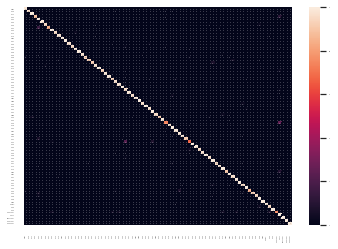

In [10]:
test_type = ['wm', 'hm']
samples_list = []
for t in test_type:
    samples = joblib.load(f'/home/huy/face_recog/encoded_data/aug5_test_{t}/features.joblib')
    run_evaluation(samples, t, threshold=0.7)

In [15]:
def split_into(lst, n_part):
    parts = []
    part_size = len(lst)//n_part
    i = 0
    while i < n_part:
        parts.append(lst[i*part_size:(i*part_size+part_size)])
        i += 1
    for i in range(len(lst) % n_part):
        key, value = lst[n_part*part_size+i]
        parts[i][key] = value
    return parts

In [ ]:
recog = FaceRecognition(
    classifier_method='euclid',
    model_dir='/home/huy/face_recog/models/simple_distance/'
)
TP_count = 0
UNK_count = 0
num_samples = 0
for id, img_paths in test_set_dict.items():
    for path in img_paths:
        img = cv2.imread(path, 1)
        predict_id = recog.recog(img,[[0,0,img.shape[1],img.shape[0]]], threshold=0.9)
        predict_id = predict_id[0][0].split('\n')[0]
        if predict_id == id:
            TP_count += 1
        elif predict_id == 'unknown':
            UNK_count +=1
        num_samples += 1
# TP rate don't care UNK
print('num_samples\t', 'TP_count\t', 'UNK_count\t')
print(num_samples, TP_count, UNK_count)
print('TP Rate ',TP_count/(num_samples-UNK_count))
# False rate
# print(1 - (TP_count+UNK_count)/num_samples
print('UNK rate ', UNK_count/num_samples)

In [ ]:
recog = FaceRecognition(
    model_dir='/home/huy/face_recog/models/knn/', 
   classifier_method='knn'
)
TP_count = 0
UNK_count = 0
num_samples = 0
for id, img_paths in test_set_dict.items():
    for path in img_paths:
        img = cv2.imread(path, 1)
        predict_id = recog.recog(img,[[0,0,img.shape[1],img.shape[0]]], threshold=0.5)
        predict_id = predict_id[0][0].split('\n')[0]
        if predict_id == id:
            TP_count += 1
        elif predict_id == 'unknown':
            UNK_count +=1
        num_samples += 1
# TP rate don't care UNK
print('num_samples\t', 'TP_count\t', 'UNK_count\t')
print(num_samples, TP_count, UNK_count)
print('TP Rate ',TP_count/(num_samples-UNK_count))
# False rate
# print(1 - (TP_count+UNK_count)/num_samples
print('UNK rate ', UNK_count/num_samples)

In [ ]:
recog = FaceRecognition(
    model_dir='/home/huy/models/simple_distance/',
    feature_extractor_type='face_recognition'
)
TP_count = 0
UNK_count = 0
num_samples = 0
for id, img_paths in test_set_dict.items():
    for path in img_paths:
        img = cv2.imread(path, 1)
        predict_id = recog.recog(img,[[0,0,img.shape[1],img.shape[0]]], threshold=0.5)
        predict_id = predict_id[0][0].split('\n')[0]
        if predict_id == id:
            TP_count += 1
        elif predict_id == 'unknown':
            UNK_count +=1
        num_samples += 1
# TP rate don't care UNK
print('num_samples\t', 'TP_count\t', 'UNK_count\t')
print(num_samples, TP_count, UNK_count)
print('TP Rate ',TP_count/(num_samples-UNK_count))
# False rate
# print(1 - (TP_count+UNK_count)/num_samples
print('UNK rate ', UNK_count/num_samples)